Cho bộ điểm $(x_i, y_i), i = \bar{1, n},$
Tìm hàm thực nghiệm dạng $$g(x) = a_1 \phi_1(x) + a_2\phi_2(x)+...+a_n\phi_k(x).$$
$\phi_1(x), \phi_2(x),..., \phi_n(x)$ gọi là hàm cơ sở.
Đặt

\begin{align}
M = \begin{pmatrix}
\phi_1(x_1) & \phi_1(x_2) & \ldots & \phi_1(x_n)\\
\phi_2(x_1) & \phi_2(x_2) & \ldots & \phi_2(x_n)\\
\vdots & \vdots & \ddots & \vdots\\
\phi_k(x_1) & \phi_k(x_2) & \ldots & \phi_k(x_n)
\end{pmatrix},\\
\end{align}

$$
Y = \begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{pmatrix}.
$$

Bộ hệ số cần tìm là:
$$
    A = \begin{pmatrix}
    a_1\\
    a_2\\
    \vdots\\
    a_k
    \end{pmatrix} = (MM^T)^{-1}MY
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys

# Input: File dữ liệu chứa x[i], y[i], Mỗi cặp (x[i], y[i]) nằm trên 1 dòng, không có 2 cặp nào nằm cùng 1 dòng
       # Các hàm cơ sở: Nhập trong hàm Phi
# Output: Bộ hệ số tương ứng với các hàm cơ sở


Nhập các hàm cơ sở ở đây, nếu không cho trước hàm cơ sở thì chạy đoạn code ở dưới để vẽ đồ thị và dự đoán dạng hàm

In [13]:
max_par = 10 # Số lượng hàm cơ sở tối đa

def Phi(x): # Các hàm cơ sở, tối đa 10 hàm, nếu 10 hàm không đủ thì thay 10 bằng số khác rồi thêm hàm cơ sở vào :V
    phi = np.zeros(max_par)
    #Nhập hàm cơ sở ở đây 
    phi[0] = 1
    phi[1] = x
    phi[2] = x*x
    phi[3] = x*x*x
    return phi

Đọc dữ liệu từ file và vẽ đồ thị để dự đoán dạng hàm 

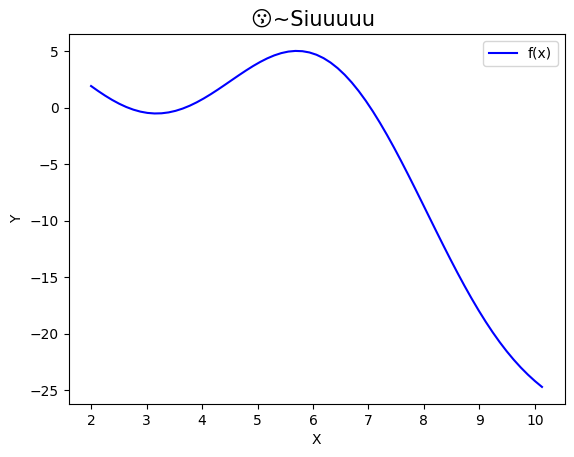

In [14]:
# Đọc dữ liệu từ file để xử lí :V 
x = []
y = []

sys.stdin = open('BinhPhuongToiThieu_input.txt', 'r')
try:
    for xi_yi in sys.stdin:
        xi_yi = xi_yi.split()
        if len(xi_yi) != 2:
            continue
        x.append(float(xi_yi[0]))
        y.append(float(xi_yi[1]))
finally:
    if sys.stdin and not sys.stdin.closed:
        sys.stdin.close()

x = np.array(x)
y = np.array(y)
n = len(x)

plt.plot(x, y, color = 'blue', label = 'f(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("😗~Siuuuuu ", fontsize = 15)
plt.show()

Gói con xử lí mấy thứ râu ria và bình phương tối thiểu

In [15]:
def SoLuongThamSo(): # Nếu số lượng tham số trong đầu ra khác với số lượng hàm cơ sở thì thay 0.5 bằng số khác đến khi bằng nhau thi thôi :V
    ans = 0
    phi = Phi(0.5)
    for i in range(max_par):
        if phi[i] != 0:
            ans += 1
    return ans

k = SoLuongThamSo()


def M_Column(x): #Tạo các cột của ma trận M :V
    ans = np.zeros(k)
    Phi_x = Phi(x)
    for i in range(k):
        ans[i] = Phi_x[i]
    return ans

def BinhPhuongNhoNhat(x, y):
    M = np.zeros((k, n))
    for i in range(n):
        M[:, i] = M_Column(x[i]) 
    M_Tranpose = np.transpose(M)
    return np.dot(np.dot(np.linalg.inv(np.dot(M, M_Tranpose)), M), y), M


Lôi data ban đầu ra và chém Bình Phương Tối Thiểu

In [10]:
HeSoCanTim, M = BinhPhuongNhoNhat(x, y)

Viết kết quả vào bài thi, cứ phang y hệt như này là ok :V

In [16]:
print("Y = [y_1 y_2 ... y_n]^T")
print("phi_1 = , phi_2 = , ...")
print(" M = Công thức (1) = ")
rounded_M = np.round(M, decimals=4)
selected_columns = np.concatenate((rounded_M[:, :2], np.full((rounded_M.shape[0], 1), '...'), rounded_M[:, -2:]), axis=1)
selected_columns_str = np.array2string(selected_columns, separator='  ', formatter={'str_kind': lambda x: x})
print(selected_columns_str)

print("Bo he so can tim [a_1 a_2 a_3 ...]^T = (MM^T)^{-1}MY = ", HeSoCanTim)

Y = [y_1 y_2 ... y_n]^T
phi_1 = , phi_2 = , ...
 M = Công thức (1) = 
[[1.0  1.0  ...  1.0  1.0]
 [2.0  2.127  ...  10.001  10.128]
 [4.0  4.5241  ...  100.02  102.5764]
 [8.0  9.6228  ...  1000.3  1038.8936]]
Bo he so can tim [a_1 a_2 a_3 ...]^T = (MM^T)^{-1}MY =  [-8.79643865  3.58357132  0.08929458 -0.06357957]


Vẽ hình để so sánh hàm thực nghiệm với dữ liệu ban đầu (Đoạn này đừng ghi vào bài thi :V)

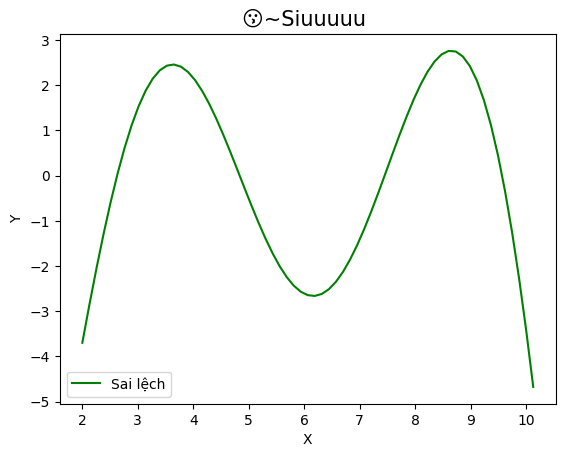

In [12]:
y_predict = np.zeros(n)
for i in range(n):
    HamCoSo = Phi(x[i])
    for j in range(k):
        y_predict[i] += HeSoCanTim[j] * HamCoSo[j]


#plt.plot(x, y, color = 'blue', label = 'f(x)')
#plt.plot(x, y_predict, color = 'red', label = 'Hàm thực nghiệm')
plt.plot(x, y_predict-y, color = 'green', label = 'Sai lệch')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title("😗~Siuuuuu ", fontsize = 15)
plt.show()

In [32]:
print()